##### Loading the dataset

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("Data/train")
new_base_dir = pathlib.Path("Data/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Data\\kaggle_dogs_vs_cats_small\\train\\cat'

##### EDA: Explore the data with relevant graphs, statistics and insights 

##### importing the required libraries

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

In [5]:
data_folder = pathlib.Path('Data/kaggle_dogs_vs_cats_small')

##### Random numbers

In [6]:
random_numbers = np.random.normal(size=(1000, 16))

In [7]:
print(type(random_numbers))
print(random_numbers.shape)
print(random_numbers.dtype)
print(random_numbers[:4])

<class 'numpy.ndarray'>
(1000, 16)
float64
[[-0.67421686 -0.32806689  0.19249349 -0.59653634 -1.48187372 -0.27241058
  -1.24124855 -0.08502384  0.7928886  -0.21082232 -0.22452926 -1.02300933
  -1.51533662  1.13466311  0.40636348 -1.15298278]
 [-1.10068628 -0.03736818  0.54664528  0.82162111  1.34930261  0.59160474
  -0.36985633 -0.87920433 -2.22244072  1.08671108  0.24809269  0.74567402
  -0.02351982 -2.47711996  0.83058999 -0.33104311]
 [ 0.04421171  1.90884224  0.89421993  1.1696314   0.54727653 -0.44400785
  -1.59861751  1.20799287 -0.68098535  0.97540821 -0.31120037  0.13854643
  -0.91590926  0.98275856  1.36629605 -1.87854019]
 [ 1.16648896 -1.26862582 -1.13546278 -1.15159518  0.55031718  0.01874384
  -1.35554298  0.07147489 -1.43515527  0.10594674 -0.52052248 -0.2800153
   0.1391107   0.92351342 -2.70284447  0.96724296]]


In [8]:
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [9]:
type(dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [10]:
for i, d in enumerate(['A','B','C']):
    print(i,d)

0 A
1 B
2 C


In [11]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [12]:
for i, element in enumerate(dataset):
    print(element)
    if i >= 2:
        break

tf.Tensor(
[-0.67421686 -0.32806689  0.19249349 -0.59653634 -1.48187372 -0.27241058
 -1.24124855 -0.08502384  0.7928886  -0.21082232 -0.22452926 -1.02300933
 -1.51533662  1.13466311  0.40636348 -1.15298278], shape=(16,), dtype=float64)
tf.Tensor(
[-1.10068628 -0.03736818  0.54664528  0.82162111  1.34930261  0.59160474
 -0.36985633 -0.87920433 -2.22244072  1.08671108  0.24809269  0.74567402
 -0.02351982 -2.47711996  0.83058999 -0.33104311], shape=(16,), dtype=float64)
tf.Tensor(
[ 0.04421171  1.90884224  0.89421993  1.1696314   0.54727653 -0.44400785
 -1.59861751  1.20799287 -0.68098535  0.97540821 -0.31120037  0.13854643
 -0.91590926  0.98275856  1.36629605 -1.87854019], shape=(16,), dtype=float64)


In [13]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [14]:
type(batched_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

##### Using Keras Utility Functions to Create a Dataset for Images


In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#### Train dataset

In [16]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

##### Displaying the shapes of the data and labels 

In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [18]:
labels_batch


<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int32)>

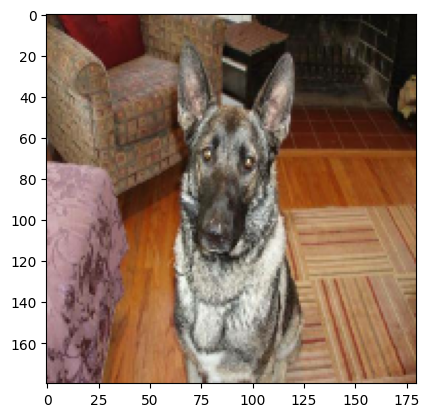

In [19]:
# import imshow
import matplotlib.pyplot as plt

plt.imshow(data_batch[0].numpy().astype("uint8"))

##### Training the CNN for a real-world image classification

##### Generating the Data

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    r'Data\kaggle_dogs_vs_cats_small\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    r'Data\kaggle_dogs_vs_cats_small\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##### Defining the CNN

In [28]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])

model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()


c:\Users\User\Desktop\AI&ML\Foundations of ML-2025\Practicallab3\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

##### Callbacks and Training the model